In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, LSTM, Reshape, Dropout, LayerNormalization
from tensorflow.keras.models import Model, Sequential
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import math
from sklearn.metrics import mean_absolute_error as mae
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import TimeDistributed
sc = MinMaxScaler(feature_range = (0,1))
df2 = []
import pandas as pd

In [2]:
df = pd.read_csv('checkAi_ONU16.csv', usecols=[0], engine='python')
print(df.head())
df = df.values
df = df.astype('float32')

   Ai
0   0
1   0
2   0
3   0
4   0


In [3]:
#df = df[:1000]
print(len(df))

43641


In [4]:
#print(df2)

In [5]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(df)

In [6]:
# split into train and test sets
train_size = int(len(dataset) * 0.7)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

30548 13093


In [7]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

In [8]:
# reshape into X=t and Y=t+1
look_back = 10
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
print(trainX.shape)
print(trainY.shape)
print(testX.shape)
print(trainX.shape[1])

(30538, 10)
(30538,)
(13083, 10)
10


In [9]:
# reshape input to be [samples, time steps, features]
#trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
#testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

#trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
#testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))

trainX = np.reshape(trainX, (trainX.shape[0], look_back, 1))
testX = np.reshape(testX, (testX.shape[0], look_back, 1))

In [10]:
timesteps_ = look_back

inputs = Input(shape=(timesteps_,))
#inputs = LayerNormalization(axis=1)(inputs)
tgt1 = tf.keras.layers.Reshape((timesteps_,1),input_shape=(timesteps_,))(inputs)

tgt1 = LSTM(units=120, return_sequences = True, input_shape=(timesteps_,1))(tgt1)
tgt1 = Dropout(0.2)(tgt1)

tgt2 = LSTM(units=120,return_sequences = True)(tgt1)
tgt2 = Dropout(0.2)(tgt2)

tgt3 = LSTM(units=120,return_sequences = True)(tgt2)
tgt3 = Dropout(0.2)(tgt3)

tgt4 = LSTM(units=120,return_sequences = True)(tgt3)
tgt4 = Dropout(0.2)(tgt4)

tgt5 = LSTM(units=120)(tgt4)
tgt5 = Dropout(0.2)(tgt5)

predictions = Dense(1)(tgt5)

model = Model(inputs=inputs, outputs=predictions)
model.compile(loss='mean_absolute_error', optimizer='adam',metrics=['mse','mae'])

history = model.fit(trainX, trainY, epochs=100, batch_size=32, validation_split=0.3) #[1,0,0], [0,0,1]

Epoch 1/100
668/668 [==============================] - 7s 10ms/step - loss: 0.0155 - mse: 0.0011 - mae: 0.0155 - val_loss: 0.0161 - val_mse: 0.0019 - val_mae: 0.0161
Epoch 2/100
668/668 [==============================] - 5s 8ms/step - loss: 0.0141 - mse: 9.9045e-04 - mae: 0.0141 - val_loss: 0.0151 - val_mse: 0.0019 - val_mae: 0.0151
Epoch 3/100
668/668 [==============================] - 5s 8ms/step - loss: 0.0136 - mse: 9.8399e-04 - mae: 0.0136 - val_loss: 0.0154 - val_mse: 0.0020 - val_mae: 0.0154
Epoch 4/100
668/668 [==============================] - 5s 8ms/step - loss: 0.0133 - mse: 9.9053e-04 - mae: 0.0133 - val_loss: 0.0148 - val_mse: 0.0021 - val_mae: 0.0148
Epoch 5/100
668/668 [==============================] - 5s 8ms/step - loss: 0.0131 - mse: 9.9180e-04 - mae: 0.0131 - val_loss: 0.0147 - val_mse: 0.0021 - val_mae: 0.0147
Epoch 6/100
668/668 [==============================] - 5s 8ms/step - loss: 0.0130 - mse: 9.8701e-04 - mae: 0.0130 - val_loss: 0.0149 - val_mse: 0.0021 - val_m

668/668 [==============================] - 5s 8ms/step - loss: 0.0124 - mse: 9.0053e-04 - mae: 0.0124 - val_loss: 0.0138 - val_mse: 0.0016 - val_mae: 0.0138
Epoch 50/100
668/668 [==============================] - 5s 8ms/step - loss: 0.0124 - mse: 8.9313e-04 - mae: 0.0124 - val_loss: 0.0142 - val_mse: 0.0019 - val_mae: 0.0142
Epoch 51/100
668/668 [==============================] - 5s 8ms/step - loss: 0.0124 - mse: 8.9936e-04 - mae: 0.0124 - val_loss: 0.0137 - val_mse: 0.0013 - val_mae: 0.0137
Epoch 52/100
668/668 [==============================] - 5s 8ms/step - loss: 0.0125 - mse: 9.1451e-04 - mae: 0.0125 - val_loss: 0.0143 - val_mse: 0.0016 - val_mae: 0.0143
Epoch 53/100
668/668 [==============================] - 5s 8ms/step - loss: 0.0124 - mse: 9.1388e-04 - mae: 0.0124 - val_loss: 0.0138 - val_mse: 0.0017 - val_mae: 0.0138
Epoch 54/100
668/668 [==============================] - 5s 8ms/step - loss: 0.0124 - mse: 9.1803e-04 - mae: 0.0124 - val_loss: 0.0139 - val_mse: 0.0014 - val_mae: 

668/668 [==============================] - 5s 8ms/step - loss: 0.0116 - mse: 7.6735e-04 - mae: 0.0116 - val_loss: 0.0142 - val_mse: 0.0018 - val_mae: 0.0142
Epoch 98/100
668/668 [==============================] - 5s 8ms/step - loss: 0.0116 - mse: 7.5867e-04 - mae: 0.0116 - val_loss: 0.0142 - val_mse: 0.0018 - val_mae: 0.0142
Epoch 99/100
668/668 [==============================] - 5s 8ms/step - loss: 0.0115 - mse: 7.4273e-04 - mae: 0.0115 - val_loss: 0.0143 - val_mse: 0.0017 - val_mae: 0.0143
Epoch 100/100
668/668 [==============================] - 5s 8ms/step - loss: 0.0116 - mse: 7.5686e-04 - mae: 0.0116 - val_loss: 0.0142 - val_mse: 0.0018 - val_mae: 0.0142


timesteps :  10
mae  :  0.0017178846895694732


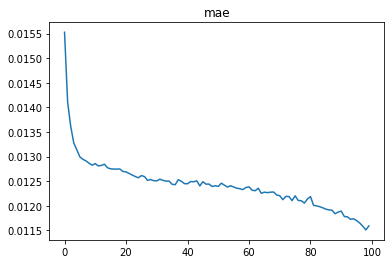

In [11]:
print('timesteps : ',timesteps_)
plt.plot(history.history['mae'])
plt.title('mae')
print('mae  : ',mae(history.history['mae'], history.history['val_mae']))

timesteps :  10


Text(0.5, 1.0, 'mse')

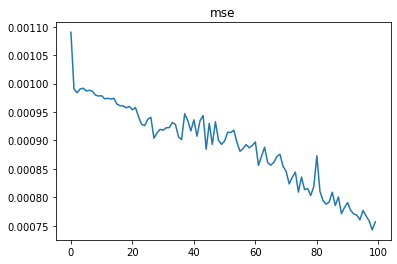

In [12]:
print('timesteps : ',timesteps_)
plt.plot(history.history['mse'])
plt.title('mse')

In [13]:
#模型評估
trainPredict = model.predict(trainX, batch_size=32)
#reset model
model.reset_states()
testPredict = model.predict(testX, batch_size=32)

In [14]:
from sklearn.metrics import mean_squared_error as mse
# make predictions
#trainPredict = model.predict(trainX)
#testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mse(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mse(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
# calculate root mean absolute error
trainScore2 = math.sqrt(mae(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMAE' % (trainScore2))
testScore2 = math.sqrt(mae(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMAE' % (testScore2))

Train Score: 21587.13 RMSE
Test Score: 29701.04 RMSE
Train Score: 89.81 RMAE
Test Score: 97.12 RMAE


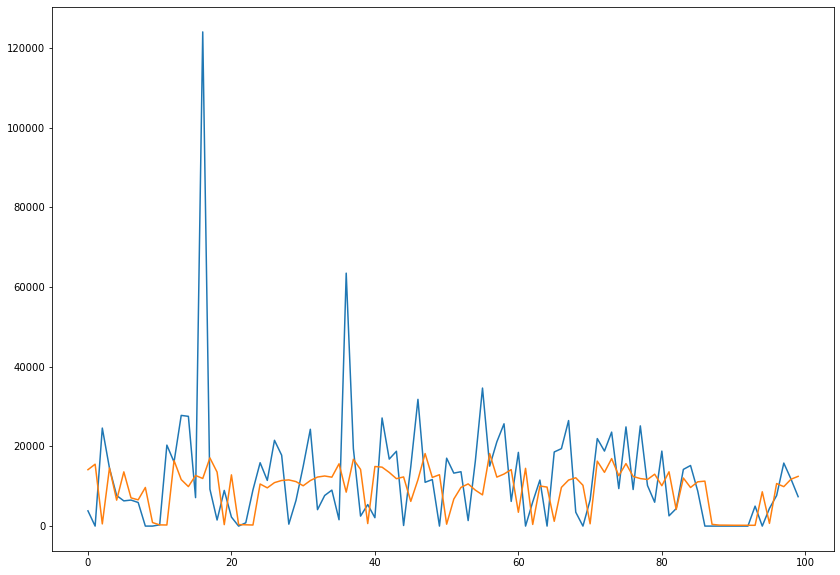

In [20]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2):len(dataset), :] = testPredict
# plot baseline and predictions
plt.figure(figsize=(14, 10))
plt.plot(scaler.inverse_transform(dataset[30648:30748]))
#plt.plot(trainPredictPlot)
plt.plot(testPredictPlot[30648:30748])
plt.show()

In [16]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 10)]              0         
_________________________________________________________________
reshape (Reshape)            (None, 10, 1)             0         
_________________________________________________________________
lstm (LSTM)                  (None, 10, 120)           58560     
_________________________________________________________________
dropout (Dropout)            (None, 10, 120)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 10, 120)           115680    
_________________________________________________________________
dropout_1 (Dropout)          (None, 10, 120)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 10, 120)          

In [17]:
from sklearn.metrics import r2_score
train_Y = trainY.T
test_Y = testY.T
print(r2_score(train_Y, trainPredict))
print(r2_score(test_Y, testPredict))

0.23302689437191426
0.10228132081468844


In [18]:
print(trainPredict.shape)

(30538, 1)


In [19]:
#model.save('U08D00_AIerror_ONU16_test0124_4layer.h5', include_optimizer=False)